<a href="https://colab.research.google.com/github/Stecklert1/UST--Deep-Learning-2026/blob/main/Deep_Learning_Assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

In [2]:
# Load MNIST
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Normalize images
x_train = x_train.astype("float32") / 255.0
x_test  = x_test.astype("float32") / 255.0

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
# Convert labels to binary:
#    1 = digit is 3
#    0 = digit is NOT 3
y_train = (y_train == 3).astype("float32")
y_test  = (y_test == 3).astype("float32")

print("Train label distribution:", np.bincount(y_train.astype(int)))
print("Test label distribution:", np.bincount(y_test.astype(int)))

Train label distribution: [53869  6131]
Test label distribution: [8990 1010]


In [6]:
model = keras.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(128, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(1, activation="sigmoid")  # Binary output
])

model.compile(
    optimizer="adam",
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [8]:
#Train
model.fit(
    x_train,
    y_train,
    epochs=5,
    batch_size=64,
    validation_split=0.2
)


test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_acc:.4f}")

Epoch 1/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9977 - loss: 0.0072 - val_accuracy: 0.9931 - val_loss: 0.0218
Epoch 2/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9983 - loss: 0.0050 - val_accuracy: 0.9918 - val_loss: 0.0283
Epoch 3/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9988 - loss: 0.0035 - val_accuracy: 0.9939 - val_loss: 0.0330
Epoch 4/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9981 - loss: 0.0055 - val_accuracy: 0.9937 - val_loss: 0.0278
Epoch 5/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9990 - loss: 0.0028 - val_accuracy: 0.9923 - val_loss: 0.0415
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9949 - loss: 0.0278
Test Accuracy: 0.9944


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
Prediction probability (is 3): 0.0000
Predicted label: not 3
True label: not 3


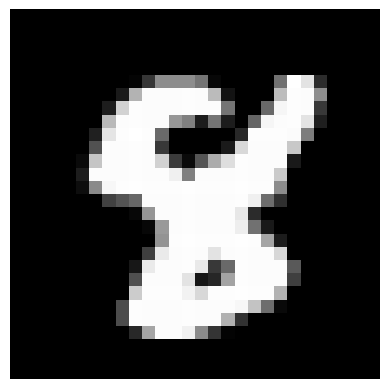

Prediction probability (is 3): 0.0000
Predicted label: not 3
True label: not 3


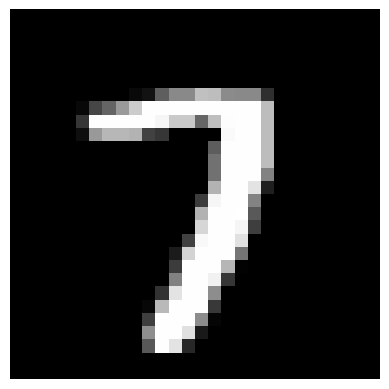

Prediction probability (is 3): 0.0000
Predicted label: not 3
True label: not 3


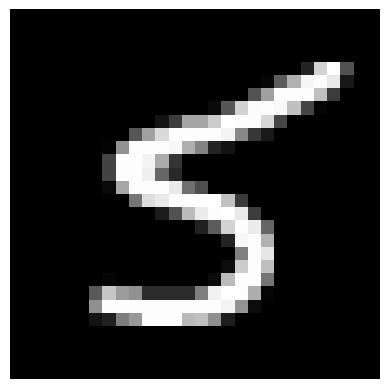

Prediction probability (is 3): 0.0000
Predicted label: not 3
True label: not 3


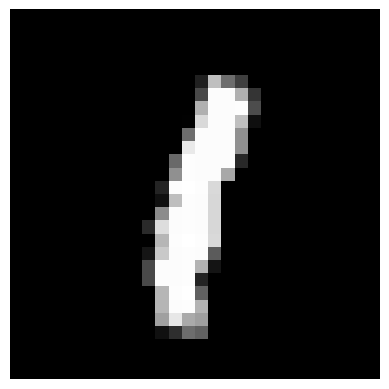

Prediction probability (is 3): 0.9999
Predicted label: 3
True label: 3


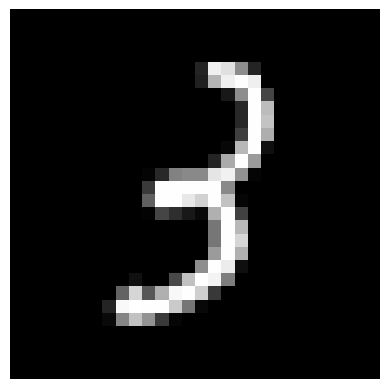

In [12]:
num_samples = 5
indices = np.random.randint(0, len(x_test), size=num_samples)

preds = model.predict(x_test[indices])

for i, idx in enumerate(indices):
    plt.imshow(x_test[idx], cmap="gray")
    plt.axis("off")

    prob = preds[i][0]
    pred_label = 1 if prob >= 0.5 else 0
    true_label = y_test[idx]

    print(f"Prediction probability (is 3): {prob:.4f}")
    print(f"Predicted label: {'3' if pred_label == 1 else 'not 3'}")
    print(f"True label: {'3' if true_label == 1 else 'not 3'}")
    plt.show()